SCPY562 Modeling and Simulation in Biophysics - Mini Project

Code I : Scan the Time-Lapse Fluorescent Image

Modified by Mr. Pasin Kiratipongwut ID 6737983

cell 1

In [ ]:
from google.colab import drive
import os
import numpy as np
import pandas as pd
import pymc as pm
import matplotlib.pyplot as plt
# Mount Google Drive
drive.mount('/content/drive')

# Path
edited_path = '/content/drive/MyDrive/MU Workspace/SCPY562 Modeling and Simulation in Biophysics/mini_proj/edited_80.0'

if os.path.exists(edited_path):
    print(f"📂 Folder found: {edited_path}")
    subfolders = os.listdir(edited_path)
    print(f"🧪 Subfolders: {subfolders[:5]} ... ({len(subfolders)} folders total)")
else:
    print("Folder path not found. Please check the path again.")


Mounted at /content/drive
📂 Folder found: /content/drive/MyDrive/MU Workspace/SCPY562 Modeling and Simulation in Biophysics/mini_proj/edited_80.0
🧪 Subfolders: ['T0035', 'T0036', 'T0033', 'Transmitted and Red Overlays', 'T0039'] ... (44 folders total)


cell 2

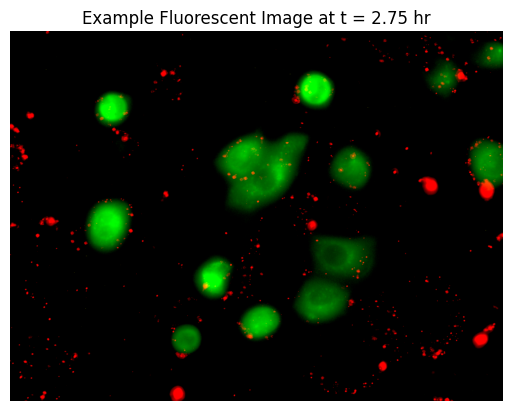

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

sample_folder = 'T0025'
sample_filename = 'T0025 Red and Green Overlay.tif'
sample_path = os.path.join(edited_path, sample_folder, sample_filename)

with Image.open(sample_path) as img:
    img_rgb = img.convert('RGB')
    img_np = np.array(img_rgb)

# Seperate channel
red_channel = img_np[:, :, 0]
green_channel = img_np[:, :, 1]

# Show example
plt.imshow(img_np)
plt.title("Example Fluorescent Image at t = 2.75 hr")
plt.axis('off')
plt.show()


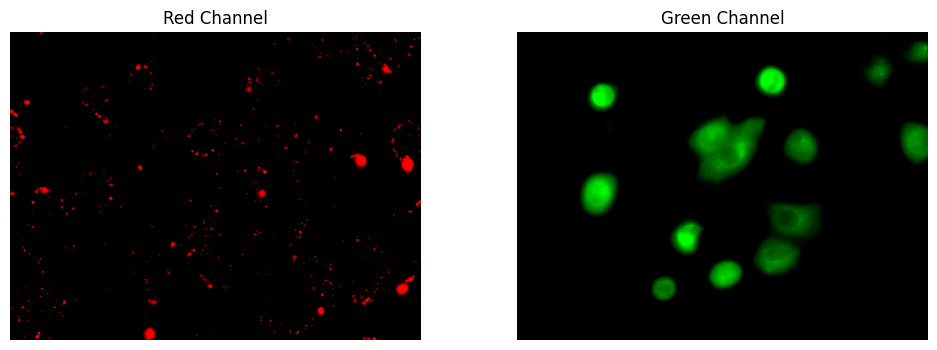

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

sample_folder = 'T0025'
sample_filename = 'T0025 Red and Green Overlay.tif'
sample_path = os.path.join(edited_path, sample_folder, sample_filename)

with Image.open(sample_path) as img:
    img_rgb = img.convert('RGB')
    img_np = np.array(img_rgb)


red_channel   = img_np[:, :, 0]
green_channel = img_np[:, :, 1]

red_img   = np.zeros_like(img_np); red_img[:, :, 0] = red_channel
green_img = np.zeros_like(img_np); green_img[:, :, 1] = green_channel

# For each color channel
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.imshow(red_img)
plt.title("Red Channel")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(green_img)
plt.title("Green Channel")
plt.axis('off')


plt.show()


cell 3

In [ ]:
from skimage.filters import threshold_otsu

def count_red_pixels_relative_to_green(image_rgb):
    red = image_rgb[:, :, 0]
    green = image_rgb[:, :, 1]

    red_thresh = threshold_otsu(red)
    green_thresh = threshold_otsu(green)

    red_mask = red > red_thresh
    green_mask = green > green_thresh
    green_mask_off = ~green_mask

    red_total = np.sum(red_mask)
    red_in_green = np.sum(red_mask & green_mask)
    red_outside_green = np.sum(red_mask & green_mask_off)

    return red_in_green, red_outside_green, red_total


cell 4

In [ ]:
import csv

# Path for Saving
csv_output_path = os.path.join(edited_path, "image_analysis_ovary", "80_pixel_counts.csv")
os.makedirs(os.path.dirname(csv_output_path), exist_ok=True)

def analyze_edited_folder(edited_folder_path):
    with open(csv_output_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["Subfolder", "Image Name", "Red on Green Count", "Red outside Green Count", "Total Red Count"])

        for folder_name in sorted(os.listdir(edited_folder_path)):
            folder_path = os.path.join(edited_folder_path, folder_name)
            if not os.path.isdir(folder_path): continue

            for file in os.listdir(folder_path):
                if file.endswith(".tif"):
                    file_path = os.path.join(folder_path, file)
                    try:
                        with Image.open(file_path) as img:
                            img_rgb = img.convert('RGB')
                            img_np = np.array(img_rgb)

                        count_on, count_out, total = count_red_pixels_relative_to_green(img_np)
                        writer.writerow([folder_name, file, count_on, count_out, total])
                        print(f"✅ {folder_name}/{file} ➜ R={total}, In={count_on}, Out={count_out}")
                    except Exception as e:
                        print(f"❌ Failed to process {file}: {e}")

    print(f"\n📄 CSV saved to: {csv_output_path}")

# Run
analyze_edited_folder(edited_path)


✅ T0001/T001 Red and Green Overlay.tif ➜ R=3168, In=510, Out=2658
✅ T0002/T002 Red and Green Overlay.tif ➜ R=2569, In=354, Out=2215
✅ T0003/T0003 Red and Green Overlay.tif ➜ R=4000, In=488, Out=3512
✅ T0004/T0004 Red and Green Overlay.tif ➜ R=4851, In=573, Out=4278
✅ T0005/T0005 Red and Green Overlay.tif ➜ R=6030, In=359, Out=5671
✅ T0006/T0006 Red and Green Overlay.tif ➜ R=6832, In=736, Out=6096
✅ T0007/T0007 Red and Green Overlay.tif ➜ R=9923, In=808, Out=9115
✅ T0008/T0008 Red and Green Overlay.tif ➜ R=13139, In=711, Out=12428
✅ T0009/T0009 Red and Green Overlay.tif ➜ R=15714, In=1292, Out=14422
✅ T0010/T0010 Red and Green Overlay.tif ➜ R=18075, In=1720, Out=16355
✅ T0011/T0011 Red and Green Overlay.tif ➜ R=23552, In=2063, Out=21489
✅ T0012/T0012 Red and Green Overlay .tif ➜ R=23552, In=2255, Out=21297
✅ T0013/T0013 Red and Green Overlay .tif ➜ R=27038, In=2631, Out=24407
✅ T0014/T0014 Red and Green Overlay.tif ➜ R=30644, In=3616, Out=27028
✅ T0015/T0015 Red and Green Overlay.tif ➜ 

cell 5

In [ ]:
import pandas as pd
import numpy as np

csv_path = csv_output_path  # จาก Cell 4

# Read pixel count CSV
df_pix = pd.read_csv(csv_path)

# Filter a single sequence (e.g., T0025) OR sort by frame order
df_pix = df_pix.sort_values(["Subfolder", "Image Name"]).reset_index(drop=True)

# Extract pixel counts
red_in_list   = df_pix["Red on Green Count"].values.astype(float)
red_out_list  = df_pix["Red outside Green Count"].values.astype(float)
red_total_list = df_pix["Total Red Count"].values.astype(float)

# Normalize pixel counts to siRNA counts
# Paper uses 120 siRNA as baseline
TOTAL_SIRNA = 120

baseline_total = red_total_list[0]  # pixel count 1st

scale_factor = TOTAL_SIRNA / baseline_total

EFP_in_counts  = red_out_list  * scale_factor   # Endosomal (inside)
Escape_counts  = red_in_list   * scale_factor   # Escaped
Total_counts   = red_total_list * scale_factor

# Trap = total – inside – escape
Trap_counts = Total_counts - (EFP_in_counts + Escape_counts)
Trap_counts = np.clip(Trap_counts, 0, None)

# Show preview
print("===== Converted siRNA Counts =====")
for i in range(5):
    print(f"Frame {i}: EFP_in = {EFP_in_counts[i]:.2f}, Escape = {Escape_counts[i]:.2f}, Trap = {Trap_counts[i]:.2f}")

# Save for later use
EFP_in_counts  = np.array(EFP_in_counts)
Escape_counts  = np.array(Escape_counts)
Trap_counts    = np.array(Trap_counts)

N_frames = len(EFP_in_counts)
print("\nFrames detected:", N_frames)


===== Converted siRNA Counts =====
Frame 0: EFP_in = 100.68, Escape = 19.32, Trap = 0.00
Frame 1: EFP_in = 83.90, Escape = 13.41, Trap = 0.00
Frame 2: EFP_in = 133.03, Escape = 18.48, Trap = 0.00
Frame 3: EFP_in = 162.05, Escape = 21.70, Trap = 0.00
Frame 4: EFP_in = 214.81, Escape = 13.60, Trap = 0.00

Frames detected: 40
